In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

MessageError: Error: credential propagation was unsuccessful

In [ ]:

base_path = '/content/drive/MyDrive/ECE143_Final_Project/'

cookbook_file_path = base_path + 'cookbook.csv'
walkability_file_path = base_path + 'walkability_dataset.csv'
happiness_file_path = base_path + 'Happiness_index_merged.csv'

In [ ]:
import pandas as pd

walkability_df = pd.read_csv(walkability_file_path)

In [ ]:
import csv

cookbook_dict = {}

with open(cookbook_file_path, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        if reader.line_num == 1:
            continue
        key = row[0]
        value = row[1]
        cookbook_dict[key] = value

In [ ]:
for column in cookbook_dict.keys():
    if column not in walkability_df.columns.values:
        print(column)

In [ ]:
# walkability_df

In [ ]:
walkability_df.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [ ]:
# checking for missing column meaning
# print(walkability_df.columns.values)

for column in walkability_df.columns.values:
    if column in cookbook_dict:
        print(f'{column}: {cookbook_dict[column]}')
    else:
        print(f'!!!{column}: None') #  No description available in codebook.

!!!OBJECTID: None
GEOID10: American Indian/Alaska Native/Native Hawaiian area
identifier; a concatenation of Current American
Indian/Alaska Native/Native Hawaiian area census code
and reservation/statistical area or off-reservation trust
land Hawaiian home land indicator
GEOID20: American Indian/Alaska Native/Native Hawaiian area
identifier; a concatenation of Current American
Indian/Alaska Native/Native Hawaiian area census code
and reservation/statistical area or off-reservation trust
land Hawaiian home land indicator
STATEFP: Census state FIPS code
COUNTYFP: Census county FIPS code
TRACTCE: Current tribal census tract code
BLKGRPCE: Current block group number
CSA: Combined Statistical Area Code
CSA_Name: CSA Area Name
CBSA: FIPS
CBSA_Name: Name of CBSA
CBSA_POP: population of CBS area
CBSA_EMP: Total Employment in area
CBSA_WRK: number of workers in CBS area
Ac_Total: Geometric Area of CBG
Ac_Water: Total area in acres
Ac_Land: Total land area in acres
Ac_Unpr: Total area not protec

NatWalkInd is the final result

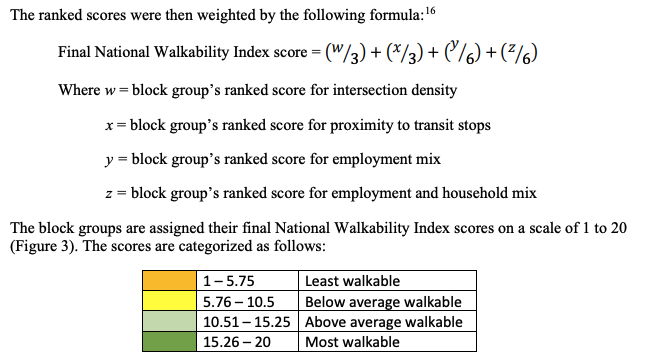

# 1 Correlation Matrix of walkability index


combining with the PCA analysis, both showing that the locality of the original data and its potential to be reduced.

In [ ]:
columns_to_drop = [
    "OBJECTID", "GEOID10", "GEOID20", "STATEFP", "COUNTYFP",
    "TRACTCE", "BLKGRPCE", "CSA", "CSA_Name", "CBSA", "CBSA_Name"
]

walkability_df_numeric_data = walkability_df.drop(columns=columns_to_drop)

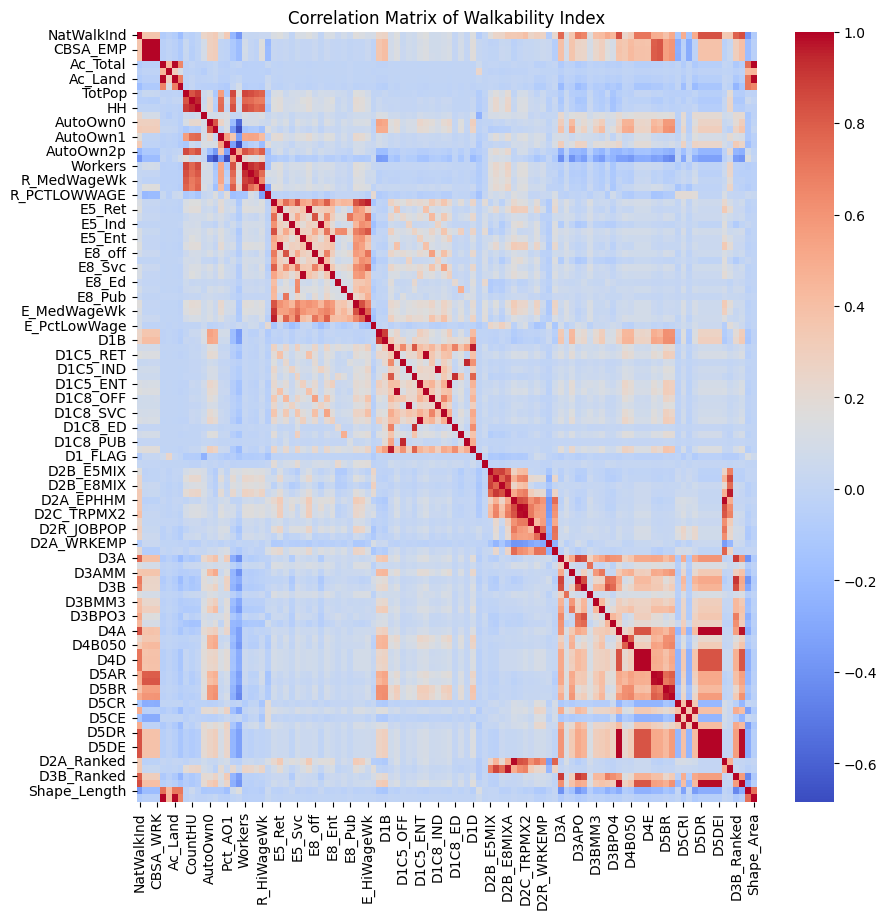

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# move NatWalkInd to the first column
columns = list(walkability_df_numeric_data.columns)
columns.insert(0, columns.pop(columns.index('NatWalkInd')))
walkability_df_numeric_data = walkability_df_numeric_data.reindex(columns=columns)

corr_matrix = walkability_df_numeric_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
# caution: it only shows harf of the columns for better visualization
plt.title("Correlation Matrix of Walkability Index")
plt.show()

The red squares shows there is local correlation and duplication of the data columns.

<ipython-input-55-4101108df1ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=walkability_corr.index, y=walkability_corr.values, palette="coolwarm")


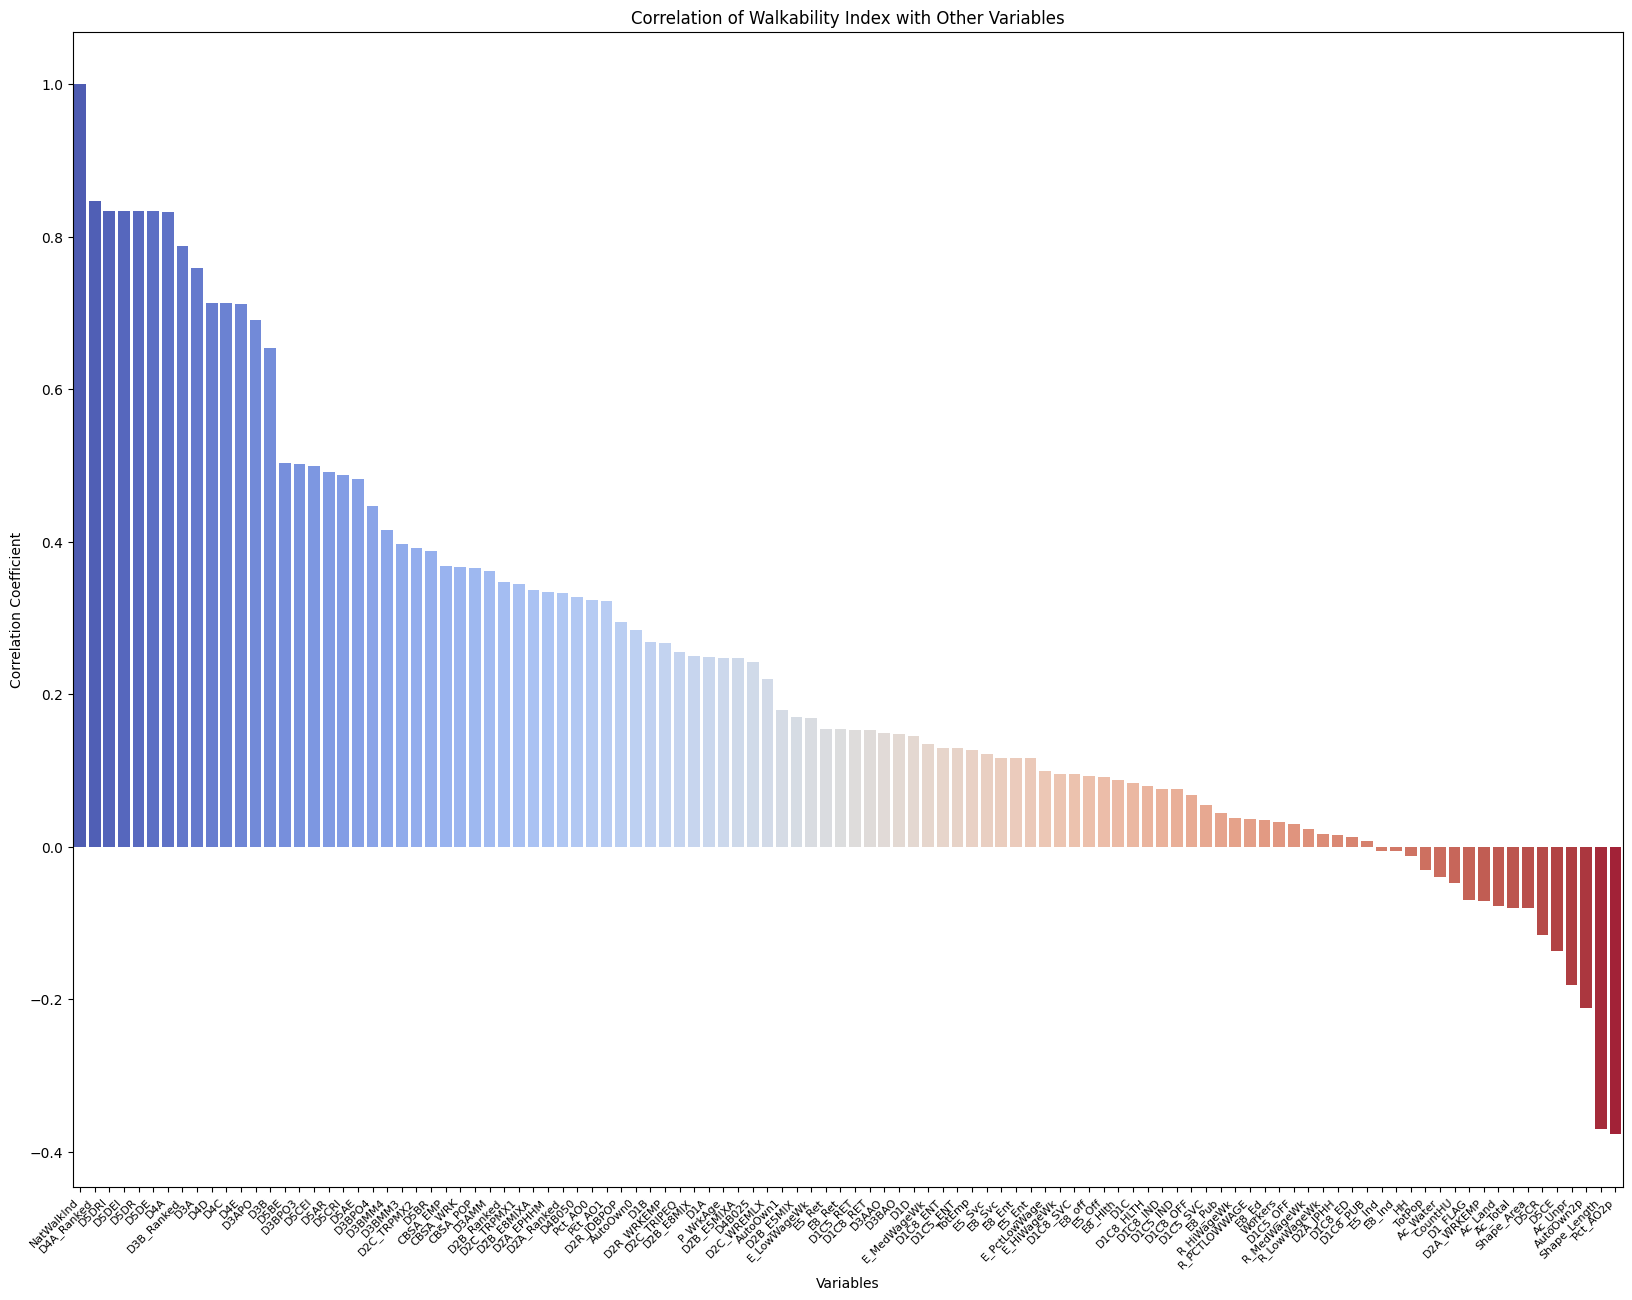

In [ ]:
walkability_corr = corr_matrix["NatWalkInd"].sort_values(ascending=False)

plt.figure(figsize=(20, 15))
barplot = sns.barplot(x=walkability_corr.index, y=walkability_corr.values, palette="coolwarm")
plt.title("Correlation of Walkability Index with Other Variables")
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.xticks(np.arange(len(walkability_corr.index)), walkability_corr.index, fontsize=8, ha='right')

# for index, variable in enumerate(walkability_corr.index):
#     plt.text(index, walkability_corr.values[index], variable, ha='center', va='bottom', fontsize=8, rotation=45)

plt.show()

It shows some variables has 0.8 correlation with the final walkability score. Remind us:

- we could reduce it and find the most important vars.

- this index method may not be perfect and we could modify it to be better.

# 2 PCA Dimensionality Reduction

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# get numerical data columns and drop Nan values
numerical_matrix = walkability_df_numeric_data.dropna().values

# normalize
numerical_matrix_normalized = normalize(numerical_matrix, axis=0, norm='max')

# pca
num_comp = 20
pca = PCA(n_components=num_comp)
pca.fit(numerical_matrix_normalized)

PCA(n_components=20)

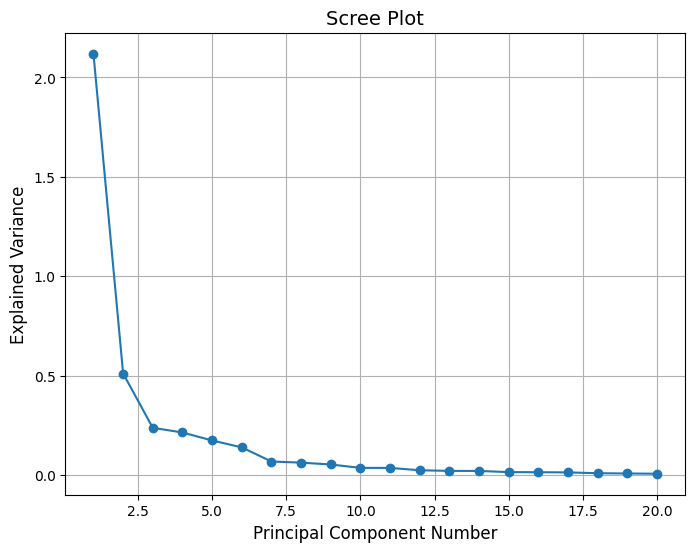

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))

# Plot explained variance
plt.plot(np.arange(1, num_comp + 1), pca.explained_variance_, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Principal Component Number', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Scree Plot', fontsize=14)

plt.grid(True)

plt.show()

In [ ]:
c = pca.components_
c.shape

(20, 106)

This is a scree plot that is useful for determining how many components to retain from the entire feature space. From this plot we see that  most of the variance is captured by only a few components. As you increase the number of componenets, the variance decreases indicating that there is not much new useful information in most of the features. This graph allows us to see that we can estimate each sample with a very small dimension without loosing much information by projecting the original datapoints onto a subspace spanned by the top k principal components.

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

for i in range(5): # only print the first 5, to get full list, use num_comp
    print(f"Principal Component {i+1}:")
    component_values = components[i]
    component_indices = np.argsort(np.abs(component_values))[::-1]
    for j in component_indices[:5]:
        print(f"\t{walkability_df_numeric_data.columns[j]}: {component_values[j]}")

Principal Component 1:
	D4A: 0.3335487025331181
	D5DEI: 0.3321080857549567
	D5DRI: 0.3321080575886998
	D5DR: 0.33210717045767363
	D5DE: 0.33210717040397775
Principal Component 2:
	D2A_Ranked: -0.36238099025510734
	D2C_WREMLX: -0.3354072952078189
	D2R_WRKEMP: -0.30148829572740987
	D2C_TRPMX2: -0.3003921103353938
	D2C_TRIPEQ: -0.2879227880678205
Principal Component 3:
	D2B_E5MIX: -0.3233938228825307
	D2B_E8MIX: -0.30566788288224805
	D2B_Ranked: -0.30418987528857544
	D2B_E5MIXA: -0.28732277853295946
	CBSA_EMP: -0.2839140471604362
Principal Component 4:
	CBSA_POP: 0.3940993988951896
	CBSA_EMP: 0.39290308960101855
	CBSA_WRK: 0.39002587959944146
	D2B_E5MIX: -0.2560248675074837
	D2B_E8MIX: -0.23666602046915736
Principal Component 5:
	D4E: -0.4526901984426174
	D4C: -0.45262142726698595
	D4D: -0.44864313992961574
	D3B_Ranked: 0.2151400891292778
	D5CRI: 0.18791427872030977


In [ ]:
def create_components_dict(components, walkability_df_numeric_data, explained_variance_ratio, num_comp):
    """
    Create a dictionary containing information about each principal component.

    Args:
        components (array-like): The components of the PCA model.
        walkability_df_numeric_data (DataFrame): The DataFrame containing numeric data.
        explained_variance_ratio (array-like): The explained variance ratio of each principal component.
        num_comp (int): The number of principal components.

    Returns:
        dict: A dictionary containing information about each principal component.
            Each key represents a principal component, and the corresponding value is a dictionary
            containing columns and their corresponding weights, as well as the variance explained by the component.
    """
    components_dict = {}

    for i in range(num_comp):
        component_info = {}
        component_values = components[i]
        component_indices = np.argsort(np.abs(component_values))[::-1]

        for j in component_indices:
            component_info[walkability_df_numeric_data.columns[j]] = component_values[j]

        components_dict[f"Principal Component {i+1}"] = {
            "Columns": component_info,
            "Variance Explained": explained_variance_ratio[i] * 100
        }

    return components_dict


components_dict = create_components_dict(components, walkability_df_numeric_data, explained_variance_ratio, num_comp)

In [ ]:
def normalize_components(components_dict):
    """
    Normalize the weights of each principal component in the components_dict.

    Args:
        components_dict (dict): A dictionary containing information about each principal component.
            Each key represents a principal component, and the corresponding value is a dictionary
            containing columns and their corresponding weights.

    Returns:
        dict: A dictionary containing normalized weights for each principal component.
            Each key represents a principal component, and the corresponding value is a dictionary
            containing columns and their normalized weights, as well as the variance explained by the component.
    """
    normalized_components_dict = {}

    for i, component_key in enumerate(components_dict.keys()):
        component_info = components_dict[component_key]

        component_columns = component_info["Columns"]
        component_values = list(component_columns.values())

        # Take the absolute values of the weights
        abs_component_values = [abs(value) for value in component_values]

        # Normalize the weights so that they sum up to 1
        normalized_values = [value / sum(abs_component_values) for value in abs_component_values]

        normalized_components_dict[component_key] = {
            "Columns": {column: normalized_values[j] for j, column in enumerate(component_columns)},
            "Variance Explained": component_info["Variance Explained"]
        }

    return normalized_components_dict


normalized_components_dict = normalize_components(components_dict)

In [ ]:
normalized_components_dict_5 = {}
normalized_components_dict_5['Principal ComOponent 1'] = normalized_components_dict['Principal Component 1']
normalized_components_dict_5['Principal Component 2'] = normalized_components_dict['Principal Component 2']
normalized_components_dict_5['Principal Component 3'] = normalized_components_dict['Principal Component 3']
normalized_components_dict_5['Principal Component 4'] = normalized_components_dict['Principal Component 4']
normalized_components_dict_5['Principal Component 5'] = normalized_components_dict['Principal Component 5']

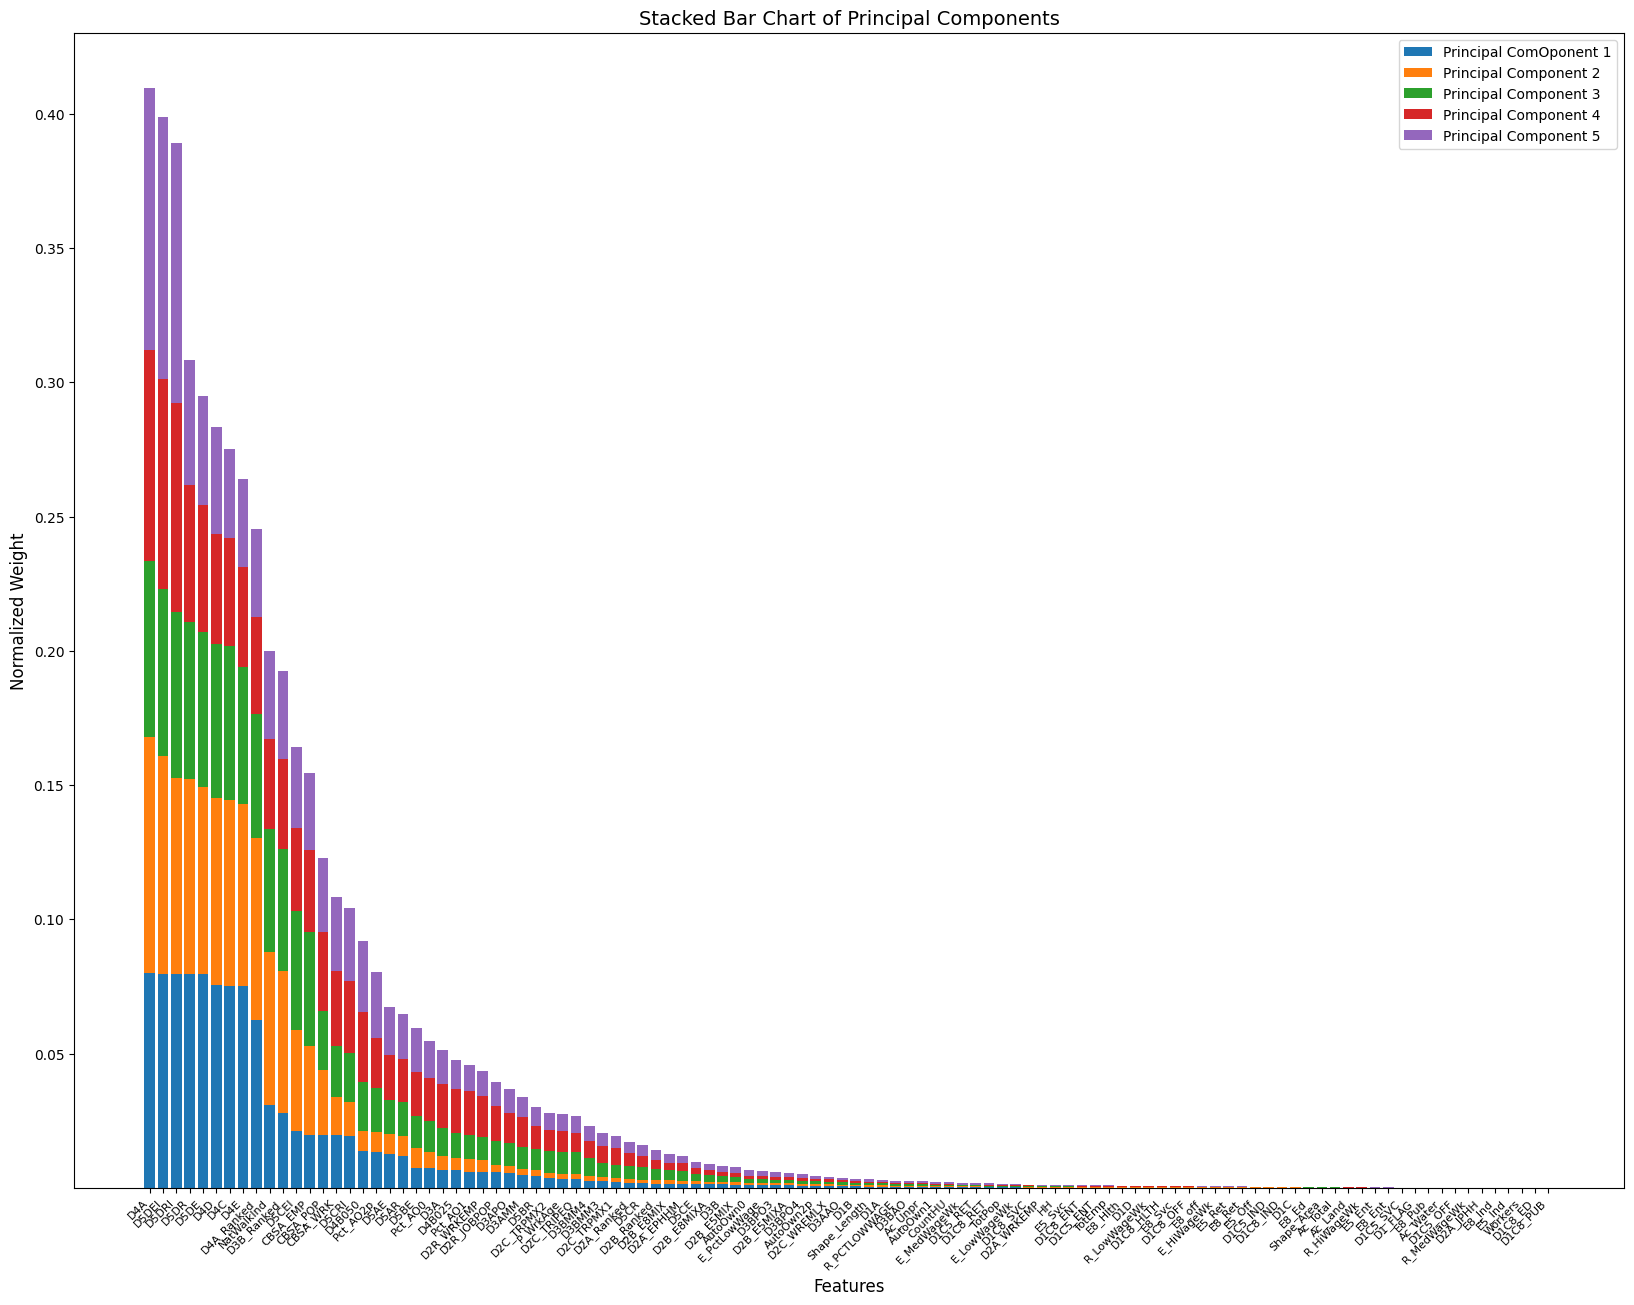

In [ ]:
import matplotlib.pyplot as plt

def plot_stacked_bar(normalized_components_dict):
    """
    Plot a stacked bar chart showing the weights of each column for each principal component.

    Args:
        normalized_components_dict (dict): A dictionary containing normalized weights for each principal component.

    Returns:
        None
    """
    component_keys = list(normalized_components_dict.keys())
    columns = list(normalized_components_dict[component_keys[0]]["Columns"].keys())

    fig, ax = plt.subplots(figsize=(20, 15))

    for i, component_key in enumerate(component_keys):
        normalized_values = list(normalized_components_dict[component_key]["Columns"].values())
        # print(sum(normalized_values)) # 1

        if i == 0:
            ax.bar(columns, normalized_values, label=component_key)
        else:
            bottom_values = [sum(values) for values in zip(*[list(normalized_components_dict[key]["Columns"].values()) for key in component_keys[:i]])]
            ax.bar(columns, normalized_values, bottom=bottom_values, label=component_key)

    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Normalized Weight', fontsize=12)
    ax.set_title('Stacked Bar Chart of Principal Components', fontsize=14)
    ax.legend(loc='upper right', fontsize=10)

    plt.xticks(rotation=45)
    plt.xticks(fontsize=8, ha='right')

    plt.show()

plot_stacked_bar(normalized_components_dict_5)

Shows the heaviness of each feature in the top 5 components. It has significant long-tail distribution. Most of the features have almost 0 impact in the PCA (not explaining the source of variance).


The top factors are:

- D4A: Proximity to transit stops: Distance from population center to nearest transit stop in meters. Shorter distances correlate with more walk trips.

- D5DEI/D5DE: Proportional Accessibility of Regional Destinations - Transit (Working age population accessibility)

- D5DRI/D5DR: Proportional Accessibility to Regional Destinations - Transit (Employment accessibility)

- D4D: Aggregate frequency of transit service per square mile

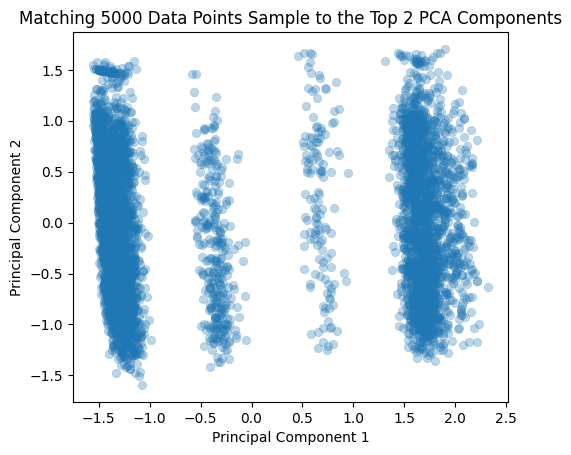

In [ ]:
import seaborn as sns

def plot_pca_scatter_seaborn(numerical_matrix_normalized):
    """
    Perform PCA on normalized numerical data and plot a scatter plot of the top 2 principal components using Seaborn.

    Args:
        numerical_matrix_normalized (array-like): The normalized numerical data matrix.
        num_comp_selected (int): The number of principal components to retain.

    Returns:
        None
    """
    pca_selected = PCA(n_components=2)
    pca_selected.fit(numerical_matrix_normalized)

    transformed_data = pca_selected.transform(numerical_matrix_normalized)

    df_transformed = pd.DataFrame(transformed_data, columns=[f"Principal Component {i+1}" for i in range(2)])

    sns.scatterplot(data=df_transformed, x='Principal Component 1', y='Principal Component 2', alpha=0.3, edgecolor=None)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Matching 5000 Data Points Sample to the Top 2 PCA Components')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


random_indices = np.random.choice(numerical_matrix_normalized.shape[0], size=5000, replace=False)
numerical_matrix_normalized_sampled = numerical_matrix_normalized[random_indices]

plot_pca_scatter_seaborn(numerical_matrix_normalized_sampled)

The data shows some degree of clustering on both the first and second principal components. indicate that there is some grouping in the original data, and that these groupings are still distinguishable when mapped to the principal component space.


# 3 new walkability index algorithm

possibly create new walkability index algorithm (look at the docs here its pretty simple just a sum of other stuff)


-- compare to old rankings

How to evaluate it? How do we know our new designed algorithm is "better" than the old one? - zhou



We are using 2 different new ways of walkability index algorithm.


- First is PCA-inspired. We use the top k PCA components to define the new index algorithm. (Not fully done yet, PCA is for variance, and we actually want something able to compare)

- Second is we use out source data to define a happiness-based walkability index algorithm that better reflect people's feeling.

# intersection of happiness index and Walkability

Create dataframe that is intersection of happiness index and Walkability
will require finding corresponding CSA (combined statistical area code) for each city in happiness city


In [ ]:
# csa_df = pd.read_csv("/content/drive/MyDrive/ECE143_Final_Project/QCEW County-MSA-CSA Crosswalk, 2013-2022.csv")

In [ ]:
# csa_df['MSA Title'] = csa_df['MSA Title'].str.replace(" MSA$", "", regex=True)
# csa_df['CSA Code'] = csa_df['CSA Code'].str.replace("^CS", "", regex=True)
# csa_df['CSA Title'] = csa_df['CSA Title'].str.replace(" CSA$", "", regex=True)

In [ ]:
# csa_df

In [ ]:
# print(happiness_df['City'].head)

In [ ]:
# walkability_df = walkability_df.dropna(subset=['CSA'])
# walkability_df['CSA'] = walkability_df['CSA'].astype(int)

In [ ]:
# csa_df = csa_df.dropna(subset=['CSA Code'])
# csa_df['CSA Code'] = csa_df['CSA Code'].astype(int)

In [ ]:
# csa_df['CSA Code'].unique()

In [ ]:
# walkability_df['CSA'].unique()

In [ ]:
happiness_df = pd.read_csv(happiness_file_path)

In [ ]:
columns_to_drop = [
    "Unnamed: 0", "Overall Rank "
]

happiness_df = happiness_df.drop(columns=columns_to_drop)

In [ ]:
happiness_df.columns

Index(['City', 'Total Score ', 'Emotional & Physical Well-Being ',
       'Income & Employment ', 'Community & Environment ', 'CSA Code_x',
       'index', 'CBSA', 'Metropolitan Division Code', 'CSA Code_y',
       'Metropolitan/Micropolitan Statistical Area',
       'Metropolitan Division Title', 'CSA Title', 'County/County Equivalent',
       'State Name', 'FIPS State Code', 'FIPS County Code',
       'Central/Outlying County'],
      dtype='object')

In [ ]:
happiness_df

,City,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,CSA Code_x,index,CBSA,Metropolitan Division Code,CSA Code_y,Metropolitan/Micropolitan Statistical Area,Metropolitan Division Title,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,Central/Outlying County
0,"Fremont, CA",76.10,1,34,1,none,1547.0,41860,36084.0,488.0,Metropolitan Statistical Area,"Oakland-Fremont-Berkeley, CA","San Jose-San Francisco-Oakland, CA",Alameda County,California,6.0,1.0,Central
1,"San Jose, CA",70.35,2,3,64,488,1552.0,41940,NaN,488.0,Metropolitan Statistical Area,NaN,"San Jose-San Francisco-Oakland, CA",San Benito County,California,6.0,69.0,Outlying
2,"Madison, WI",69.72,5,41,8,357,1035.0,31540,NaN,357.0,Metropolitan Statistical Area,NaN,"Madison-Janesville-Beloit, WI",Columbia County,Wisconsin,55.0,21.0,Outlying
3,"Overland Park, KS",68.93,6,87,6,312,85.0,11860,NaN,312.0,Micropolitan Statistical Area,NaN,"Kansas City-Overland Park-Kansas City, MO-KS",Atchison County,Kansas,20.0,5.0,Central
4,"San Francisco, CA",68.73,4,8,69,488,1547.0,41860,36084.0,488.0,Metropolitan Statistical Area,"Oakland-Fremont-Berkeley, CA","San Jose-San Francisco-Oakland, CA",Alameda County,California,6.0,1.0,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,"Montgomery, AL",35.40,177,173,142,NaN,1144.0,33860,NaN,388.0,Metropolitan Statistical Area,NaN,"Montgomery-Selma, AL",Autauga County,Alabama,1.0,1.0,Central
178,"Cleveland, OH",34.16,171,169,182,NaN,380.0,17410,NaN,184.0,Metropolitan Statistical Area,NaN,"Cleveland-Akron-Canton, OH",Ashtabula County,Ohio,39.0,7.0,Outlying
179,"Shreveport, LA",33.21,180,180,150,NaN,1634.0,43340,NaN,508.0,Metropolitan Statistical Area,NaN,"Shreveport-Bossier City-Minden, LA",Bossier Parish,Louisiana,22.0,15.0,Central
180,"Huntington, WV",32.83,182,107,140,NaN,NaN,16620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# happiness_df = happiness_df[happiness_df['CSA Code'] != 'none']
happiness_df = happiness_df.dropna(subset=['CBSA'])
happiness_df['CBSA'] = happiness_df['CBSA'].astype(int)
walkability_df = walkability_df.dropna(subset=['CBSA'])
walkability_df['CBSA'] = walkability_df['CBSA'].astype(int)

In [ ]:
# combined_df = pd.merge(walkability_df, csa_df, left_on='CSA', right_on='CSA Code', how='left')
# combined_df

In [ ]:
# we need happiness_df & walkability_df to have a 'CBSA' column
# then
merged_df = pd.merge(happiness_df, walkability_df, left_on='CBSA', right_on='CBSA', how='inner')
merged_df

,City,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,CSA Code_x,index,CBSA,Metropolitan Division Code,CSA Code_y,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,"Fremont, CA",76.1,1,34,1,none,1547.0,41860,36084.0,488.0,...,0.048674,0.000136,0.074128,12,9,19,16,15.166667,2877.862344,3.461155e+05
1,"Fremont, CA",76.1,1,34,1,none,1547.0,41860,36084.0,488.0,...,-99999.000000,-99999.000000,-99999.000000,10,4,18,1,8.666667,5428.954190,1.278154e+06
2,"Fremont, CA",76.1,1,34,1,none,1547.0,41860,36084.0,488.0,...,-99999.000000,-99999.000000,-99999.000000,20,20,18,1,13.000000,5760.068093,1.468745e+06
3,"Fremont, CA",76.1,1,34,1,none,1547.0,41860,36084.0,488.0,...,-99999.000000,-99999.000000,-99999.000000,17,12,19,1,11.500000,5369.270520,1.131865e+06
4,"Fremont, CA",76.1,1,34,1,none,1547.0,41860,36084.0,488.0,...,0.041108,0.000112,0.060930,15,19,12,16,15.000000,2956.519181,3.871322e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300482,"Detroit, MI",30.6,181,178,180,NaN,518.0,19820,19804.0,220.0,...,0.110973,0.000332,0.123615,17,13,11,19,15.000000,5657.349514,9.401003e+05
300483,"Detroit, MI",30.6,181,178,180,NaN,518.0,19820,19804.0,220.0,...,0.112613,0.000342,0.127582,5,2,9,17,9.833333,2030.399036,2.378998e+05
300484,"Detroit, MI",30.6,181,178,180,NaN,518.0,19820,19804.0,220.0,...,0.066753,0.000248,0.092381,8,11,16,14,13.166667,3042.020184,5.896558e+05
300485,"Detroit, MI",30.6,181,178,180,NaN,518.0,19820,19804.0,220.0,...,0.067086,0.000254,0.094627,15,12,18,14,15.166667,3289.176949,6.498549e+05


In [ ]:
merged_df.columns.values

array(['City', 'Total Score ', 'Emotional & Physical Well-Being ',
       'Income & Employment ', 'Community & Environment ', 'CSA Code_x',
       'index', 'CBSA', 'Metropolitan Division Code', 'CSA Code_y',
       'Metropolitan/Micropolitan Statistical Area',
       'Metropolitan Division Title', 'CSA Title',
       'County/County Equivalent', 'State Name', 'FIPS State Code',
       'FIPS County Code', 'Central/Outlying County', 'OBJECTID',
       'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE',
       'CSA', 'CSA_Name', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK',
       'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU',
       'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1',
       'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk',
       'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off',
       'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind',
       'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_P

In [ ]:
average_df = merged_df.groupby(['City', 'CBSA'])['NatWalkInd'].mean().reset_index()
average_df.rename(columns={'NatWalkInd': 'Average NatWalkInd'}, inplace=True)
average_df

,City,CBSA,Average NatWalkInd
0,"Akron, OH",10420,7.458409
1,"Albuquerque, NM",10740,11.232456
2,"Amarillo, TX",11100,10.716503
3,"Anaheim, CA",31080,13.484239
4,"Anchorage, AK",11260,9.896071
...,...,...,...
175,"West Valley City, UT",39340,10.791667
176,"Wichita, KS",48620,10.045259
177,"Wilmington, DE",37980,12.378503
178,"Winston-Salem, NC",49180,6.427203


In [ ]:
merged_with_average = pd.merge(merged_df.drop(columns=['NatWalkInd']), average_df, on=['City', 'CBSA'], how='right')
merged_with_average = merged_with_average.drop_duplicates()
merged_with_average

,City,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,CSA Code_x,index,CBSA,Metropolitan Division Code,CSA Code_y,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,Shape_Length,Shape_Area,Average NatWalkInd
0,"Akron, OH",39.65,165,168,156,NaN,15.0,10420,NaN,184.0,...,-99999.000000,-99999.000000,-99999.000000,9,6,11,1,5133.687568,9.399181e+05,7.458409
1,"Akron, OH",39.65,165,168,156,NaN,15.0,10420,NaN,184.0,...,-99999.000000,-99999.000000,-99999.000000,19,15,7,1,9066.281050,4.697047e+06,7.458409
2,"Akron, OH",39.65,165,168,156,NaN,15.0,10420,NaN,184.0,...,-99999.000000,-99999.000000,-99999.000000,14,20,8,1,8271.828346,2.640369e+06,7.458409
3,"Akron, OH",39.65,165,168,156,NaN,15.0,10420,NaN,184.0,...,-99999.000000,-99999.000000,-99999.000000,19,20,5,1,9768.870467,4.547135e+06,7.458409
4,"Akron, OH",39.65,165,168,156,NaN,15.0,10420,NaN,184.0,...,-99999.000000,-99999.000000,-99999.000000,19,15,9,1,5918.517659,2.393715e+06,7.458409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300482,"Worcester, MA",51.65,74,117,171,NaN,1903.0,49340,NaN,148.0,...,0.017622,0.000695,0.047564,16,11,6,13,12029.127900,5.350678e+06,9.420525
300483,"Worcester, MA",51.65,74,117,171,NaN,1903.0,49340,NaN,148.0,...,0.007157,0.000320,0.021919,15,6,7,13,7478.624382,2.612799e+06,9.420525
300484,"Worcester, MA",51.65,74,117,171,NaN,1903.0,49340,NaN,148.0,...,0.030970,0.001235,0.084517,17,17,13,16,6440.910490,8.855366e+05,9.420525
300485,"Worcester, MA",51.65,74,117,171,NaN,1903.0,49340,NaN,148.0,...,0.257844,0.004682,0.320302,15,11,10,18,2499.098187,3.420802e+05,9.420525


create new correlation matrix with previous studies happiness


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def inverse_normalize(df, column_name):
    scaler = MinMaxScaler()

    df[column_name] = scaler.fit_transform(df[[column_name]])

    df[column_name] = 1 - df[column_name]

    return df

merged_with_average = inverse_normalize(merged_with_average, 'Income & Employment ')
merged_with_average = inverse_normalize(merged_with_average, 'Emotional & Physical Well-Being ')
merged_with_average = inverse_normalize(merged_with_average, 'Community & Environment ')

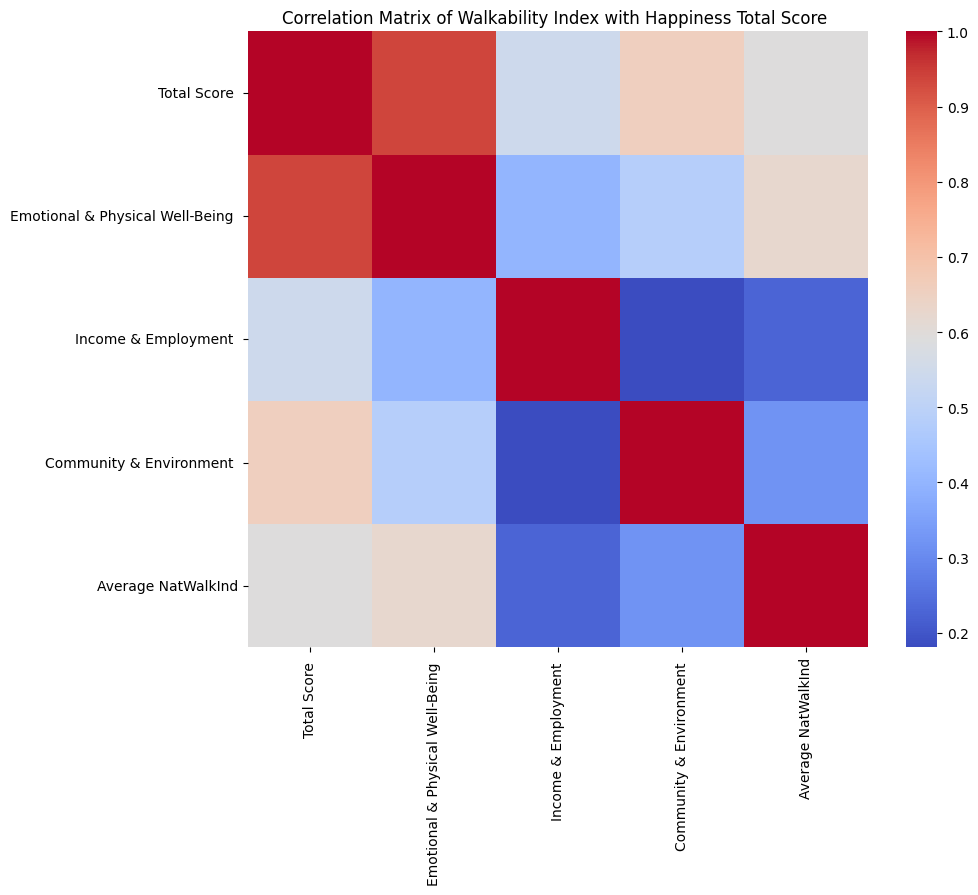

In [ ]:
corr_matrix = merged_with_average[['Total Score ', 'Emotional & Physical Well-Being ', 'Income & Employment ', 'Community & Environment ', 'Average NatWalkInd']].corr()

# walkability_vs_happiness_corr = corr_matrix["Total Score "].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Walkability Index with Happiness Total Score ")
plt.show()

In [ ]:
corr_matrix

,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,Average NatWalkInd
Total Score,1.000000,0.938993,0.543617,0.654368,0.592631
Emotional & Physical Well-Being,0.938993,1.000000,0.400972,0.483961,0.623266
Income & Employment,0.543617,0.400972,1.000000,0.180609,0.227712
Community & Environment,0.654368,0.483961,0.180609,1.000000,0.321285
Average NatWalkInd,0.592631,0.623266,0.227712,0.321285,1.000000


the Correlation between Happiness v.s. walkability is quite reasonable. walkability and happiness score have 0.56 correlation. And is most related to Emotional & Physical Well-Being of the city.

In [ ]:
merged_df.columns

Index(['City', 'Total Score ', 'Emotional & Physical Well-Being ',
       'Income & Employment ', 'Community & Environment ', 'CSA Code_x',
       'index', 'CBSA', 'Metropolitan Division Code', 'CSA Code_y',
       ...
       'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked',
       'D4A_Ranked', 'NatWalkInd', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=134)

In [ ]:
merged_df = merged_df[~merged_df.isin([-99999]).any(axis=1)]
merged_df.dropna(inplace=True)

<ipython-input-88-b8a803ea51f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.dropna(inplace=True)


In [ ]:
features_not_include = ['Emotional & Physical Well-Being ',
                        'Income & Employment ',
                        'Community & Environment ',
                        'OBJECTID'
                        'City',
                        'Total Score ',
                        'CSA Code_x',
                        'index',
                        'CBSA',
                        'Metropolitan Division Code',
                        'CSA Code_y',
                        'Metropolitan/Micropolitan Statistical Area',
                        'Metropolitan Division Title',
                        'CSA Title',
                        'County/County Equivalent',
                        'State Name',
                        'FIPS State Code',
                        'FIPS County Code',
                        'Central/Outlying County',
                        'CSA_Name',
                        'CBSA_Name',
                        'GEOID10',
                        'GEOID20',
                        'STATEFP',
                        'COUNTYFP',
                        'TRACTCE',
                        'BLKGRPCE',
                        'CSA',
                        'CBSA_POP',
                        'CBSA_EMP',
                        'CBSA_WRK']

feature_list = [x for x in merged_df.columns.values.tolist() if x not in features_not_include]

In [ ]:
# X.columns.values.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import scipy.sparse as sp
import numpy as np


X = merged_df[feature_list]
y = merged_df['Total Score ']

# non_numeric_columns = X.select_dtypes(exclude=['number']).columns.tolist()
# encoder = OneHotEncoder(handle_unknown='ignore')
# X = encoder.fit_transform(X[non_numeric_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

ValueError: could not convert string to float: 'Anaheim, CA'

Use parameter as weight to get the new happiness-inspired walkability index method.

And then calculate the correlation between the new index method v.s. the real happiness

In [ ]:
coefficients = model.coef_

predictions = model.predict(X)
merged_df['New Walkability'] = predictions

correlation = merged_df['New Walkability'].corr(merged_df['Total Score '])
print(f"Correlation between Predictions and Total Score: {correlation}")

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
corr_matrix = merged_df[['Total Score ', 'Emotional & Physical Well-Being ', 'Income & Employment ', 'Community & Environment ', 'New Walkability']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Walkability Index with Happiness Total Score ")
plt.show()

KeyError: "['New Walkability'] not in index"

actually new walk v.s. other variables do not make sense. (it is not important anyway)

# Data visualization

use geographic mapping libraries to display data with corresponding city
(possible reccomendation system that zhou recommended)